<a href="https://colab.research.google.com/github/aashish-chaubey/ds_fundamentals/blob/main/SMOTE_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imbalanced-learn

In [2]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [4]:
counter = Counter(y)
counter

Counter({0: 9900, 1: 100})

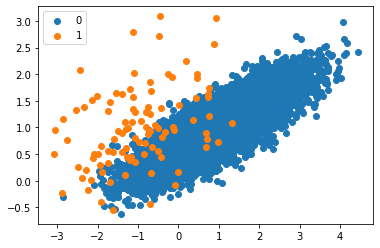

In [5]:
for label, _ in counter.items():
  # print(label, _)
  # print(np.where(y == label)[0])
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [6]:
oversampling = SMOTE()

In [7]:
X_resampled, y_resampled = oversampling.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [8]:
resampled_counter = Counter(y_resampled)

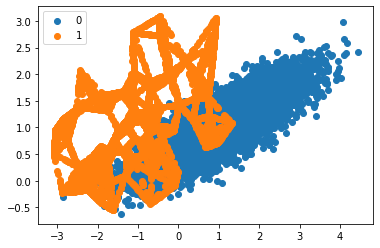

In [9]:
for label, _ in resampled_counter.items():
  row_ix = np.where(y_resampled == label)[0]
  plt.scatter(X_resampled[row_ix, 0], X_resampled[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [10]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [11]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [12]:
# Again transform the dummy data
X_enhance_smote, y_enhance_smote = pipeline.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
counter_enhanced = Counter(y_enhance_smote)

In [14]:
counter_enhanced.items()

dict_items([(0, 1980), (1, 990)])

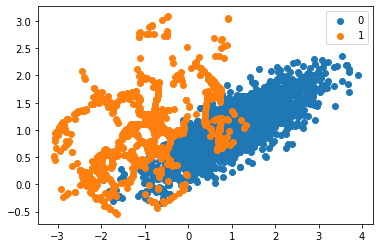

In [15]:
for label, _ in counter_enhanced.items():
  row_ix = np.where(y_enhance_smote == label)[0]
  plt.scatter(X_enhance_smote[row_ix, 0], X_enhance_smote[row_ix, 1], label=str(label))
plt.legend()
plt.show()

### SMOTE with classification technique

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [17]:
# Using the SMOTE transformed Data Set

model = DecisionTreeClassifier()
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model, X_enhance_smote, y_enhance_smote, scoring='roc_auc', cv=cross_validation, n_jobs=-1)

In [18]:
print("Mean ROC-AUC : %.3f" % np.mean(scores))

Mean ROC-AUC : 0.924


In [19]:
# Without using the SMOTE transformed dataset

model = DecisionTreeClassifier()
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, cv=cross_validation, n_jobs=-1, scoring='roc_auc')

In [20]:
print("Mean ROC-AUC: %.3f" % np.mean(scores))

Mean ROC-AUC: 0.768
